Graph algorithms are a set of techniques used to solve problems on graphs. A graph is a collection of vertices (nodes) connected by edges. Graph algorithms can be used to solve problems such as finding the shortest path between two nodes, finding the minimum spanning tree of a graph, or detecting cycles in a graph.

One popular graph algorithm is the Kruskal's algorithm, which is used to find the minimum spanning tree (MST) of a graph. A minimum spanning tree is a tree that connects all the vertices in a graph with the minimum possible total weight. For example, if we have a graph with 5 vertices, the minimum spanning tree would be a tree with 4 edges that connects all 5 vertices with the minimum possible total weight.

Kruskal's algorithm works by sorting all the edges in the graph by weight and then adding the edges to the MST one by one, starting with the edge with the lowest weight. However, when adding an edge, we must make sure that it doesn't create a cycle in the MST. If adding an edge creates a cycle, we skip that edge and move on to the next edge.

We want to implement the given graph as a greedy database using a linked list and optimize it. Let's start by implementing the graph as an adjacency list, which is a common way to represent graphs using linked lists.

The given Graph:

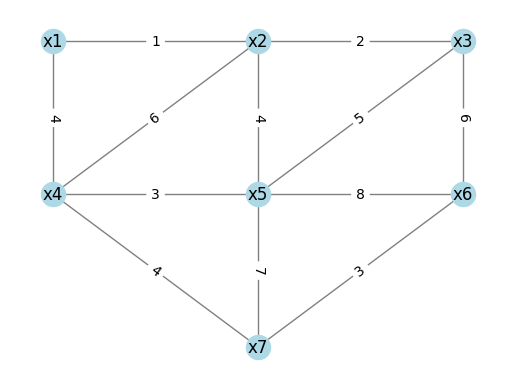

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

# create the graph object
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])

# add edges to the graph
G.add_edge('x1', 'x2', weight=1)
G.add_edge('x1', 'x4', weight=4)
G.add_edge('x2', 'x4', weight=6)
G.add_edge('x2', 'x3', weight=2)
G.add_edge('x2', 'x5', weight=4)
G.add_edge('x3', 'x5', weight=5)
G.add_edge('x3', 'x6', weight=6)
G.add_edge('x4', 'x5', weight=3)
G.add_edge('x4', 'x7', weight=4)
G.add_edge('x5', 'x6', weight=8)
G.add_edge('x5', 'x7', weight=7)
G.add_edge('x6', 'x7', weight=3)

# define positions of nodes for plotting
pos = {'x1': (0, 1), 'x2': (1, 1), 'x3': (2, 1),
       'x4': (0, 0), 'x5': (1, 0), 'x6': (2, 0), 'x7': (1, -1)}

# draw the graph with edge labels
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='grey')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

# display the graph
plt.axis('off')
plt.show()

Implementing the Graph

First, we create a class for the nodes and the graph:

In [2]:
class Node:
    def __init__(self, value):
        self.value = value
        self.edges = []

class Graph:
    def __init__(self):
        self.nodes = []

    def add_node(self, value):
        node = Node(value)
        self.nodes.append(node)
        return node

    def add_edge(self, node1, node2, weight):
        node1.edges.append((node2, weight))
        node2.edges.append((node1, weight))

Next, we create the graph and add the nodes and edges according to the given diagram:

In [3]:
graph = Graph()

# Create nodes
x1 = graph.add_node("x1")
x2 = graph.add_node("x2")
x3 = graph.add_node("x3")
x4 = graph.add_node("x4")
x5 = graph.add_node("x5")
x6 = graph.add_node("x6")
x7 = graph.add_node("x7")

# Add edges
graph.add_edge(x1, x2, 1)
graph.add_edge(x1, x4, 4)
graph.add_edge(x2, x3, 2)
graph.add_edge(x2, x4, 6)
graph.add_edge(x2, x5, 4)
graph.add_edge(x3, x5, 5)
graph.add_edge(x3, x6, 6)
graph.add_edge(x4, x5, 3)
graph.add_edge(x4, x7, 4)
graph.add_edge(x5, x7, 7)
graph.add_edge(x6, x5, 8)
graph.add_edge(x6, x7, 3)

Optimizing the Graph

To optimize the graph, you can remove redundant edges. One approach to finding redundant edges is to use the Minimum Spanning Tree (MST) algorithm, such as Kruskal's algorithm or Prim's algorithm, which will give you a tree that connects all nodes with the minimum possible total weight.

For this example, let's use Kruskal's algorithm:
1. Sort all the edges in ascending order of their weights.
2. Start adding the edges to the MST from the sorted list, but only if adding the edge doesn't create a cycle.
3. Repeat step 2 until all nodes are part of the MST.

To implement Kruskal's algorithm, we can use a disjoint-set data structure to keep track of which vertices are connected. We start by initializing each vertex as a separate set. Then, we sort the edges by weight and iterate through them one by one. For each edge, we check if the vertices it connects are in the same set. If they are, we skip the edge. If they are not, we add the edge to the MST and merge the two sets.

The time complexity of Kruskal's algorithm is O(E log E), where E is the number of edges in the graph. This is because we need to sort the edges by weight, which takes O(E log E) time, and then iterate through them one by one, which takes O(E) time.

In [4]:
def find(parent, node):
    if parent[node] == node:
        return node
    return find(parent, parent[node])

def union(parent, rank, node1, node2):
    root1 = find(parent, node1)
    root2 = find(parent, node2)

    if rank[root1] < rank[root2]:
        parent[root1] = root2
    elif rank[root1] > rank[root2]:
        parent[root2] = root1
    else:
        parent[root2] = root1
        rank[root1] += 1

def kruskal(graph):
    mst = []

    # Sort edges
    edges = []
    for node in graph.nodes:
        for edge in node.edges:
            edges.append((node, edge[0], edge[1]))
    edges = sorted(edges, key=lambda x: x[2])

    # Initialize disjoint set data structure
    parent = {}
    rank = {}
    for node in graph.nodes:
        parent[node] = node
        rank[node] = 0

    # Iterate through sorted edges and add to MST if it doesn't form a cycle
    for edge in edges:
        node1, node2, weight = edge
        if find(parent, node1) != find(parent, node2):
            mst.append(edge)
            union(parent, rank, node1, node2)

    return mst

mst = kruskal(graph)

Now the mst variable contains the edges that form the Minimum Spanning Tree. You can use these edges to create an optimized version of the graph or simply display the optimized graph.

In [ ]:
for edge in mst:
    print(f"{edge[0].value} -- {edge[1].value} (Weight: {edge[2]})")

x1 -- x2 (Weight: 1)
x2 -- x3 (Weight: 2)
x4 -- x5 (Weight: 3)
x6 -- x7 (Weight: 3)
x1 -- x4 (Weight: 4)
x4 -- x7 (Weight: 4)


Optimized graph:

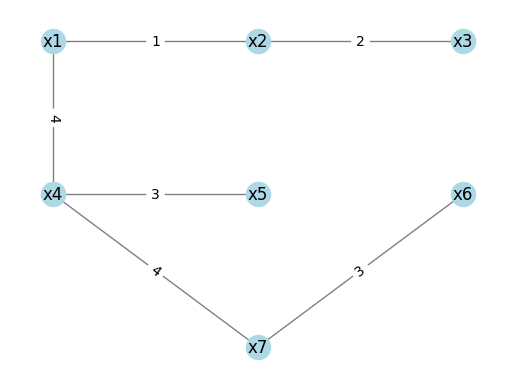

In [5]:
#import networkx as nx
#import matplotlib.pyplot as plt

# create the graph object
G = nx.Graph()

# add nodes to the graph
G.add_nodes_from(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'])

# add edges to the graph
G.add_edge('x1', 'x2', weight=1)
G.add_edge('x2', 'x3', weight=2)
G.add_edge('x4', 'x5', weight=3)
G.add_edge('x6', 'x7', weight=3)
G.add_edge('x1', 'x4', weight=4)
G.add_edge('x4', 'x7', weight=4)

# define positions of nodes for plotting
pos = {'x1': (0, 1), 'x2': (1, 1), 'x3': (2, 1),
       'x4': (0, 0), 'x5': (1, 0), 'x6': (2, 0), 'x7': (1, -1)}

# draw the graph with edge labels
nx.draw_networkx(G, pos=pos, with_labels=True, node_color='lightblue', edge_color='grey')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

# display the graph
plt.axis('off')
plt.show()